# Analyzing Climate and Energy systems with Data Commons
Data Commons combines several data sources into a single database. It connects references to the same entities (such as cities, counties, organizations, and so on) across multiple datasets. Data Commons allows users to get data on a certain entity aggregated from several sources without data cleaning or joining. At Data Commons, you can find any [statistical variables](https://datacommons.org/tools/statvar) you need for you data science project. Data Commons provides REST API, Python, and Google Sheets add-on for you to query data. In this tutorial, we will use the [Python API](https://docs.datacommons.org/api/python/) 

**To better understand terms in this tutorial, please refered to the [Glossary of Common Terms](https://docs.datacommons.org/glossary.html)**

In [ ]:
# Install data commons
!pip install datacommons_pandas --upgrade --quiet

     |████████████████████████████████| 45 kB 2.8 MB/s 


## Let's see what can we do with data commons
Let's reproduce the [Total Annual Greenhouse Gas Emissions (Non-Biogenic)(2019)](https://datacommons.org/tools/map#%26sv%3DAnnual_Emissions_GreenhouseGas_NonBiogenic%26pc%3D1%26denom%3DCount_Person%26pd%3Dcountry%2FUSA%26ept%3DState%26ppt%3DEpaReportingFacility%26mp%3D1%26domain%3D0.09726531564285644%3A53.02501569983372%3A105.95276608402459) through the Python API.

In [ ]:
# Import data commons
import datacommons_pandas as dc

# dcid for USA
usa = "country/USA"

In [ ]:
# Get the list of facilities dcid
facilities = dc.get_places_in([usa], 'EpaReportingFacility')[usa]

# Show some sample of the list
facilities[-10:]

['epaGhgrpFacilityId/1013761',
 'epaGhgrpFacilityId/1013763',
 'epaGhgrpFacilityId/1013764',
 'epaGhgrpFacilityId/1013765',
 'epaGhgrpFacilityId/1013771',
 'epaGhgrpFacilityId/1013772',
 'epaGhgrpFacilityId/1013773',
 'epaGhgrpFacilityId/1013774',
 'epaGhgrpFacilityId/1013783',
 'epaGhgrpFacilityId/1013785']

In [ ]:
# The dcid of the variable we want to use to duild up our dataframe
variable = "Annual_Emissions_GreenhouseGas_NonBiogenic"

# Build up dataframe with Python API
df_facilities = dc.build_multivariate_dataframe(facilities, [variable])

# Show some sample from the dataframe
df_facilities.sample(10)

,Annual_Emissions_GreenhouseGas_NonBiogenic
place,
epaGhgrpFacilityId/1000819,2067297.488
epaGhgrpFacilityId/1012577,78501.296
epaGhgrpFacilityId/1008965,49704.492
epaGhgrpFacilityId/1005060,42385.014
epaGhgrpFacilityId/1000136,1553800.792
epaGhgrpFacilityId/1007723,36408.790
epaGhgrpFacilityId/1012007,44590.432
epaGhgrpFacilityId/1008209,184429.834
epaGhgrpFacilityId/1006703,136187.932


In [ ]:
# Add new property to the dataframe according the the place dcid
def add_prop(df, prop):
  df[prop] = df.index.map(dc.get_property_values(df.index, prop))
  df[prop] = df[prop].str[0]

In [ ]:
# Run for the dataframe to add the name of facilities
add_prop(df_facilities, 'name')

# Show some sample
df_facilities.sample(10)

,Annual_Emissions_GreenhouseGas_NonBiogenic,name
place,,
epaGhgrpFacilityId/1004937,3.216660e+04,Anr Pipeline Sandwich Cs
epaGhgrpFacilityId/1011739,1.118128e+05,Pride Mine
epaGhgrpFacilityId/1004125,4.730010e+04,Detroit Renewable Power LLC
epaGhgrpFacilityId/1001055,6.725541e+06,Antelope Valley
epaGhgrpFacilityId/1001014,1.040486e+05,Debary Power Plant
epaGhgrpFacilityId/1004927,6.717942e+04,Great Lakes Gas Transmission Pipeline Crystal ...
epaGhgrpFacilityId/1002786,6.560035e+04,Greater Lebanon Refuse Ldfl
epaGhgrpFacilityId/1008687,8.393428e+03,Pratt Compressor Station
epaGhgrpFacilityId/1010586,2.186736e+05,Globalfoundries U.S. Inc. Fab 8


In [ ]:
# To plot those facilities on map, we also need the latitude and longitude of thoes facilities
# Add latitude to the dataframe
add_prop(df_facilities, 'latitude')
# Add longitude to the dataframe
add_prop(df_facilities, 'longitude')
# Show some samples
df_facilities.sample(10)

,Annual_Emissions_GreenhouseGas_NonBiogenic,name,latitude,longitude
place,,,,
epaGhgrpFacilityId/1002652,63678.358,"Mexichem Specialty Resins, Inc.",41.135266,-89.341088
epaGhgrpFacilityId/1001522,1402259.234,Waukegan,42.3833,-87.8133
epaGhgrpFacilityId/1005458,880012.170,Argos Cement LLC,29.690671,-82.582134
epaGhgrpFacilityId/1005751,415704.424,American Crystal Sugar - E Grand Forks,47.925833,-97.006111
epaGhgrpFacilityId/1002577,91063.164,Athens,39.24099,-82.12427
epaGhgrpFacilityId/1013303,266195.074,De3 Operating LLC - Permian Basin (430) Operat...,32.72411,-97.38696
epaGhgrpFacilityId/1006038,368560.892,Delaware Valley Resource Recovery Facility,39.8275,-75.38728
epaGhgrpFacilityId/1009148,4403.100,Transco Station 65,30.99226,-90.699203
epaGhgrpFacilityId/1009466,39216.980,Gulf South Pipeline - Olla Station,31.87482,-92.26317


In [ ]:
# Plot on map
import plotly.graph_objects as go
import pandas as pd

df_facilities['text'] = df_facilities['name'] + '<br>GHG Emission ' + round(df_facilities['Annual_Emissions_GreenhouseGas_NonBiogenic']/1e3, 1).astype(str)+' K'
# df_facilities.reset_index(inplace=True)
df_facilities = df_facilities.sort_values(by=['Annual_Emissions_GreenhouseGas_NonBiogenic'], ascending=False)

limits = [(0,10),(11,30),(31,50),(51,100),(101, len(df_facilities))]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]
scale = 1e5

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df_facilities[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['longitude'],
        lat = df_sub['latitude'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['Annual_Emissions_GreenhouseGas_NonBiogenic']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = 'Top {0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = 'Industrial and Electricity Facility-Level (Non-biogenic) Greenhouse Gas Emissions in the US (2019)',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()


#### Top 300

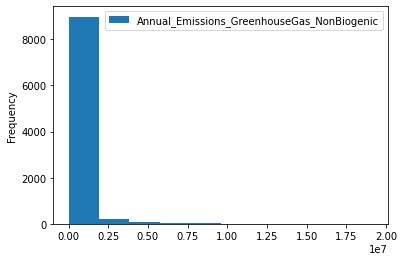

In [ ]:
import pandas as pd
df_facilities.plot(kind='hist')

In [ ]:
a = df_facilities[df_facilities['Annual_Emissions_GreenhouseGas_NonBiogenic'] < 0.25*1e7]
len(a)

9079

In [ ]:
df_facilities.head()

,Annual_Emissions_GreenhouseGas_NonBiogenic,name,latitude,longitude,text
place,,,,,
epaGhgrpFacilityId/1007227,1.916974e+07,James H Miller Jr,33.6319,-87.0597,James H Miller Jr<br>GHG Emission 19169.7 K
epaGhgrpFacilityId/1000676,1.514472e+07,Monroe,41.8917,-83.3461,Monroe<br>GHG Emission 15144.7 K
epaGhgrpFacilityId/1001020,1.427756e+07,Colstrip,45.8831,-106.614,Colstrip<br>GHG Emission 14277.6 K
epaGhgrpFacilityId/1000192,1.418019e+07,Labadie,38.5583,-90.8361,Labadie<br>GHG Emission 14180.2 K
epaGhgrpFacilityId/1001051,1.376442e+07,Scherer,33.0583,-83.8072,Scherer<br>GHG Emission 13764.4 K


In [ ]:
dc.get_property_labels(['epaGhgrpFacilityId/1001020'])

{'epaGhgrpFacilityId/1001020': ['address',
  'containedInPlace',
  'epaFrsId',
  'epaGhgrpFacilityId',
  'latitude',
  'longitude',
  'naics',
  'name',
  'partOf',
  'provenance',
  'typeOf']}

In [ ]:
# Plot on map
import plotly.graph_objects as go
import pandas as pd

df_facilities['text'] = df_facilities['name'] + '<br>GHG Emission ' + round(df_facilities['Annual_Emissions_GreenhouseGas_NonBiogenic']/1e3, 1).astype(str)+' K'
# df_facilities.reset_index(inplace=True)
df_facilities = df_facilities.sort_values(by=['Annual_Emissions_GreenhouseGas_NonBiogenic'], ascending=False)

limits = [(0,50),(51,100),(101,200),(201,300),(301, len(df_facilities))]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]
scale = 1e5

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df_facilities[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['longitude'],
        lat = df_sub['latitude'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['Annual_Emissions_GreenhouseGas_NonBiogenic']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = 'Top {0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = 'Industrial and Electricity Facility-Level (Non-biogenic) Greenhouse Gas Emissions in the US (2019)',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

#### APIs and Statistical Variable used for the plot above

*   Python APIs

  1.   `get_places_in` requires two arguments: `dcids` and `place_type`. And it will return a `dict` of strings. For details refered to [Retrieve places contained within other places page.](https://docs.datacommons.org/api/python/place_in.html)
  2.   `build_multivariate_dataframe` requires two arguments: `places` and `stat_vars`. And it will return a `pandas.DataFrame` with `places` as index and `stat_vars` as columns. For details refered to [Retrieve multivariate DataFrame page.](https://docs.datacommons.org/api/pandas/multivariate_dataframe.html)
  3. `get_property_values` requires two arguments: `dcids` and `prop`. And it will return values associated with the given property for each node. And it also has other optional arguments `value_type`, `out` and `limit`. For details refered to [Retrieve property values of nodes page.](https://docs.datacommons.org/api/python/property_value.html)


*   Statistical Variable
  1. `dcid`: [Annual_Emissions_GreenhouseGas_NonBiogenic](https://datacommons.org/browser/Annual_Emissions_GreenhouseGas_NonBiogenic)
  2. `name`: Total Annual Greenhouse Gas Emissions (Non-Biogenic) \\
  (PS: To query data from Data Commons, always remember use the `dcid` of the `StatisticalVariable` with the `typeOf` `StatisticalVariable` rather than the `dcid` of its source which has the `typeOf` `Provenance`)
 



#### What does the plot tells us?


[EPA_GHGRPFacilities](https://datacommons.org/browser/dc/j2t5h92)

In [ ]:
# The Top 300
top_300 = df_facilities.iloc[:300]

In [ ]:
top_300.Annual_Emissions_GreenhouseGas_NonBiogenic.sum() / df_facilities.Annual_Emissions_GreenhouseGas_NonBiogenic.sum()

0.4949096569327749

> Top 300 out of 9312 facilities emitted around 50% of the GHG in 2019.

#### PM2.5 vs GHG Emission

In [ ]:
counties = dc.get_places_in([usa], 'County')[usa]

In [ ]:
# The dcid of the variable we want to use to duild up our dataframe
variable_list = ["Annual_Emissions_GreenhouseGas_NonBiogenic", "Annual_Amount_Emissions_EPAFuelCombustionOther_NonBiogenicEmissionSource_PM2.5"]

# Build up dataframe with Python API
df_counties = dc.build_multivariate_dataframe(counties, variable_list)

# Show some sample from the dataframe
df_counties.sample(10)

,Annual_Emissions_GreenhouseGas_NonBiogenic,Annual_Amount_Emissions_EPAFuelCombustionOther_NonBiogenicEmissionSource_PM2.5
place,,
geoId/38065,5127628.546,1.763187
geoId/72105,NaN,6.041273
geoId/46135,36930.860,24.017442
geoId/55039,340003.442,195.912833
geoId/13317,NaN,13.023492
geoId/28035,248741.816,69.168687
geoId/17047,NaN,23.069846
geoId/29147,1213.096,59.738261
geoId/29189,859945.842,1124.210397


In [ ]:
add_prop(df_counties, 'name')
df_counties.sample(10)

,Annual_Emissions_GreenhouseGas_NonBiogenic,Annual_Amount_Emissions_EPAFuelCombustionOther_NonBiogenicEmissionSource_PM2.5,name
place,,,
geoId/01045,NaN,39.508843,Dale County
geoId/53007,0.000,226.523782,Chelan County
geoId/18161,NaN,16.359805,Union County
geoId/05047,129403.454,50.115189,Franklin County
geoId/36101,157961.350,163.549530,Steuben County
geoId/18153,4895818.450,31.791782,Sullivan County
geoId/51085,2730152.632,163.021010,Hanover County
geoId/48387,NaN,5.973137,Red River County
geoId/72029,NaN,9.779877,Canóvanas


In [ ]:
# Add FIPS of County
df_counties['FIPS'] = df_counties.index
df_counties['FIPS'] = df_counties['FIPS'].astype('str') 

In [ ]:
# add 2017 data
def add_place_stat(df, stat_var, date):
  for i in df.index:
    df.at[i, stat_var] = dc.get_stat_value(i, stat_var, date)

In [ ]:
add_place_stat(df_counties, 'Count_Person', '2017')

In [ ]:
df_counties.head()

,Annual_Emissions_GreenhouseGas_NonBiogenic,Annual_Amount_Emissions_EPAFuelCombustionOther_NonBiogenicEmissionSource_PM2.5,name,FIPS,Count_Person
place,,,,,
geoId/01001,4809878.532,45.872862,Autauga County,geoId/01001,55448.0
geoId/01003,213270.250,114.208596,Baldwin County,geoId/01003,212737.0
geoId/01005,19863.876,20.817830,Barbour County,geoId/01005,25169.0
geoId/01007,NaN,21.759710,Bibb County,geoId/01007,22532.0
geoId/01009,47811.420,65.408505,Blount County,geoId/01009,57801.0
